In [28]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('AB_NYC_2019.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [30]:
df.drop(['id','name','host_name','last_review'], axis=1, inplace=True)

In [31]:
df.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [32]:
df.fillna({'reviews_per_month':0}, inplace=True)

In [33]:
df.isnull().sum()
df.dropna(how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

In [34]:
# Descriptive statistics for the 'price' column
df["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

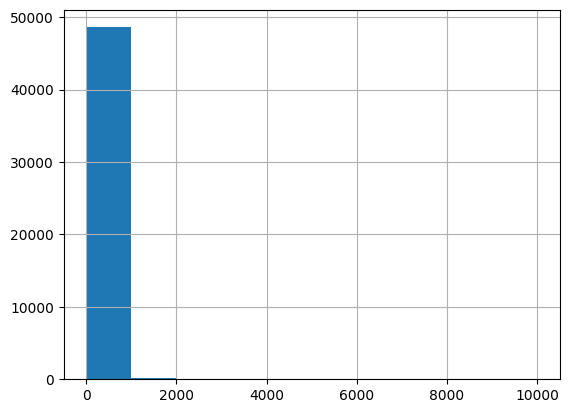

In [35]:
# Histogram of the 'price' column
hist_price = df["price"].hist()
plt.show()

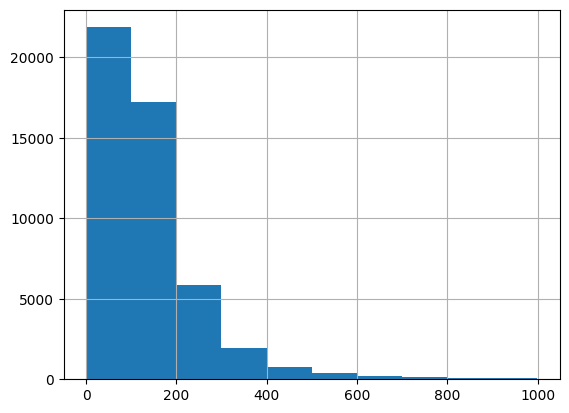

In [36]:
# Histogram of prices less than $1000
hist_price1 = df["price"][df["price"] < 1000].hist()
plt.show()

In [37]:
# Filtering listings with price > 1000
df[df["price"] > 1000]

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
496,836168,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,0.33,11,0
762,605463,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,0.31,4,297
946,256239,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000,7,0,0.00,1,365
1105,2325861,Manhattan,Lower East Side,40.72152,-73.99279,Private room,1300,1,0,0.00,1,0
1480,836168,Manhattan,Upper West Side,40.77516,-73.98573,Entire home/apt,2000,30,59,0.71,11,364
...,...,...,...,...,...,...,...,...,...,...,...,...
48080,203565865,Manhattan,SoHo,40.72060,-74.00023,Entire home/apt,1308,2,0,0.00,1,179
48304,270214015,Manhattan,Hell's Kitchen,40.75533,-73.99866,Entire home/apt,2999,30,0,0.00,1,222
48305,272166348,Manhattan,Upper East Side,40.78132,-73.95262,Entire home/apt,1999,30,0,0.00,1,270
48523,217732163,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369,1,0,0.00,1,349


In [38]:
# Removing listings with price > 1000 (treating them as outliers)
df = df[df["price"] < 1000]

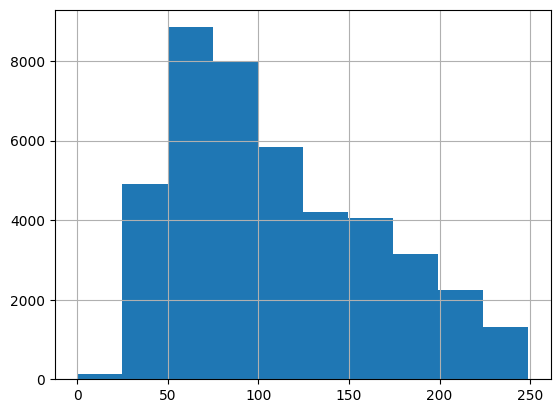

In [39]:
# Histogram of prices less than $250 after removing outliers
hist_price2 = df["price"][df["price"] < 250].hist()
plt.show()

In [40]:
# Descriptive statistics for the 'price' column after filtering
df["price"].describe()

count    48597.000000
mean       140.237299
std        112.906258
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max        999.000000
Name: price, dtype: float64

In [41]:
# Count unique neighborhoods
df['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3908
Bedford-Stuyvesant    3701
Harlem                2650
Bushwick              2463
Hell's Kitchen        1948
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [42]:
# Filter neighborhoods with more than 200 listings
dfnh = df.groupby("neighbourhood").filter(lambda x: x['neighbourhood'].count() > 200)

In [43]:
# Check the number of listings after filtering neighborhoods
len(dfnh["neighbourhood"])

42029

In [44]:
# Check for duplicate host_ids and find the maximum number of listings per host_id
df1 = df.groupby(["host_id"])
max(df1.size())

327

In [45]:
# Finding the host_id with the maximum number of listings
host_id_counts = df1["host_id"].value_counts()
max_host = host_id_counts.idxmax()
max_host

219517861

In [46]:
# Analyzing the distribution of room types
df['room_type'].value_counts()

room_type
Entire home/apt    25166
Private room       22275
Shared room         1156
Name: count, dtype: int64

In [47]:
# Calculating the average price per room type
rt_price = df.groupby("room_type")["price"].mean()

In [48]:
# Displaying the average prices per room type
rt_price

room_type
Entire home/apt    192.932806
Private room        84.555196
Shared room         66.001730
Name: price, dtype: float64

In [49]:
# Analyzing the 'minimum_nights' column
df["minimum_nights"].describe()

count    48597.000000
mean         6.975019
std         20.275227
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

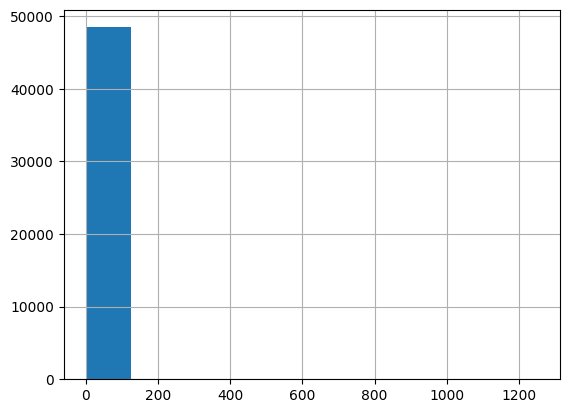

In [50]:
# Histogram of minimum nights
hist_mn = df["minimum_nights"].hist()
plt.show()

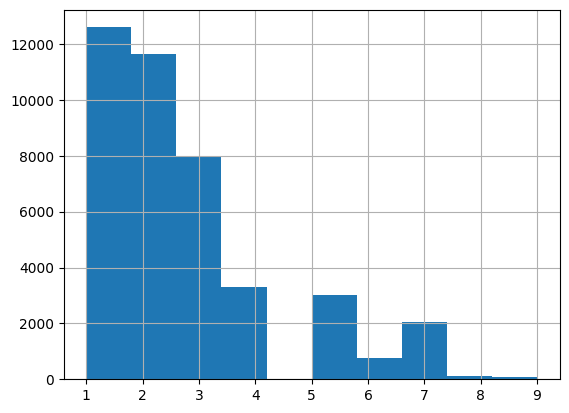

In [51]:
# Closer look at minimum nights
hist_mn1 = df["minimum_nights"][df["minimum_nights"] < 10].hist()
plt.show()

In [52]:
# Replacing records with minimum nights > 30 by 30
df.loc[(df.minimum_nights > 30), "minimum_nights"] = 30

In [53]:
# Checking the correlation between minimum nights and price
df["minimum_nights"].corr(df["price"])

0.04337529187353166

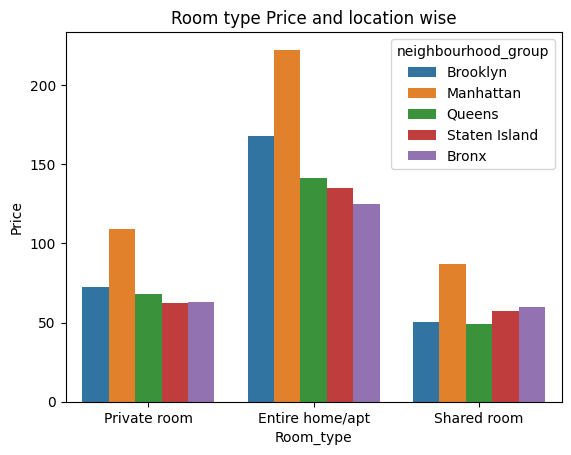

In [54]:
sns.barplot(x = df['room_type'],y=df['price'],errorbar=None,hue=df['neighbourhood_group'])
plt.title('Room type Price and location wise')
plt.xlabel('Room_type')
plt.ylabel('Price')
plt.show()

Text(0, 0.5, 'number_of_reviews')

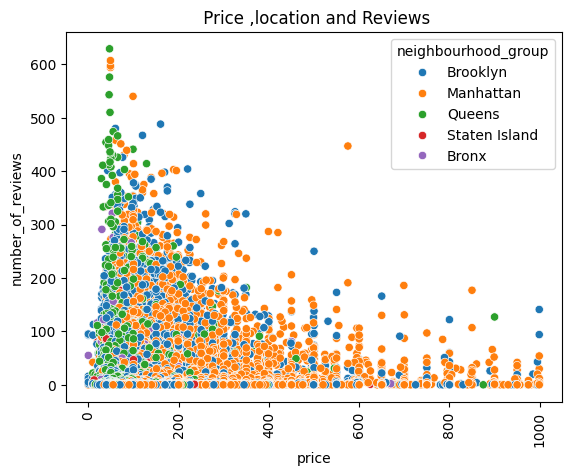

In [55]:
sns.scatterplot(x = df['price'],y=df['number_of_reviews'], c ='pink',hue=df["neighbourhood_group"])
plt.xticks(rotation=90) 
plt.title(' Price ,location and Reviews')
plt.xlabel('price')
plt.ylabel('number_of_reviews')

In [56]:
citywise_property=df.groupby('neighbourhood_group')['calculated_host_listings_count'].sum()
citywise_property

neighbourhood_group
Bronx              2430
Brooklyn          45765
Manhattan        276310
Queens            22977
Staten Island       862
Name: calculated_host_listings_count, dtype: int64

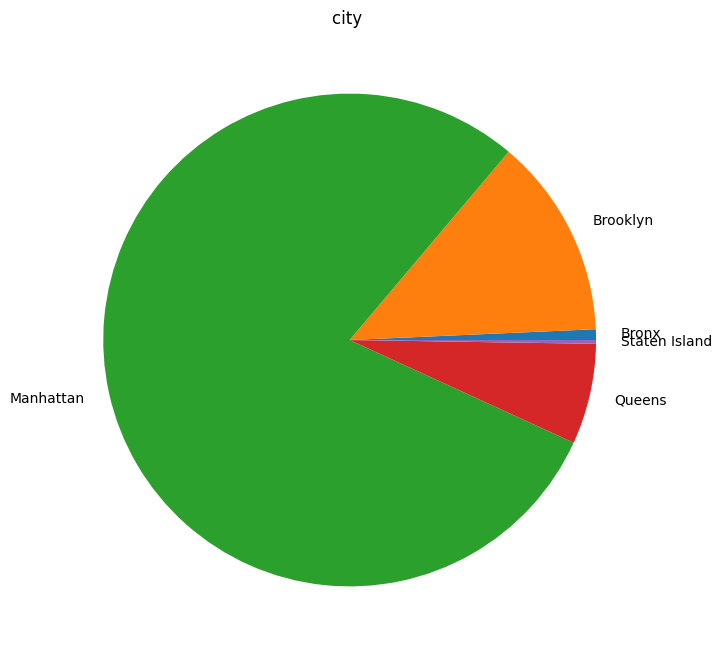

In [57]:
plt.figure(figsize = (8, 8))

plt.pie(x = citywise_property.values, labels = citywise_property.index)
plt.title("city ")
plt.show()

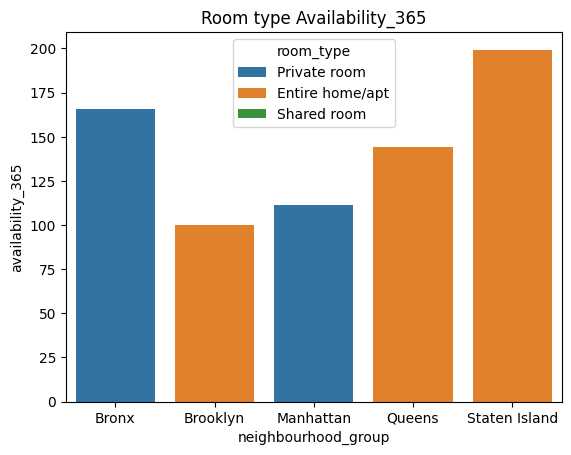

In [58]:
availability=df.groupby('neighbourhood_group')['availability_365'].mean().reset_index()

sns.barplot(data=availability,
            x='neighbourhood_group',
            y='availability_365',
            hue=df['room_type']);
plt.title('Room type Availability_365');

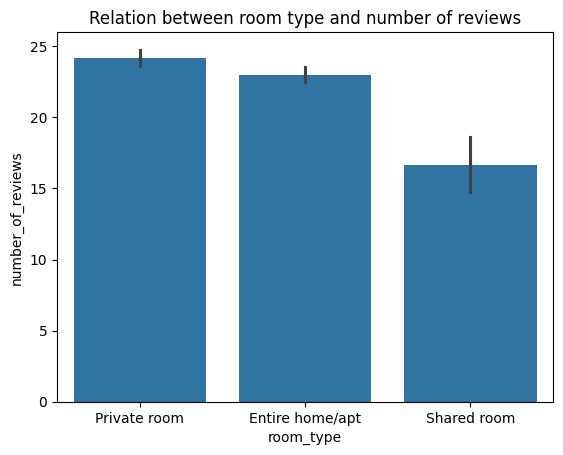

In [59]:
sns.barplot(data=df,
            x='room_type',
            y='number_of_reviews');
plt.title('Relation between room type and number of reviews');

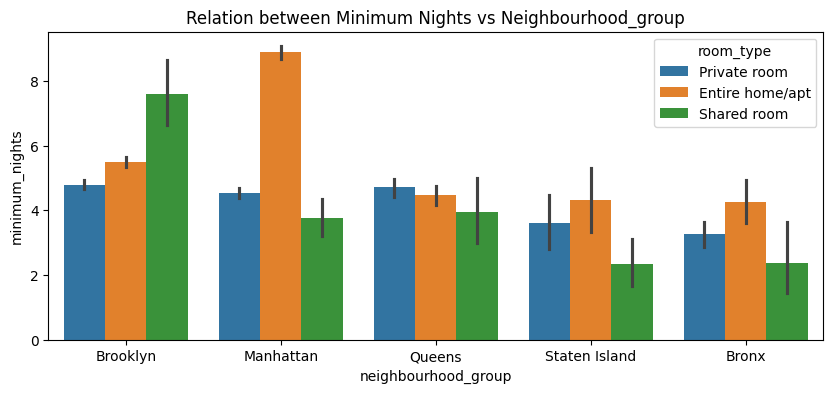

In [60]:
plt.figure(figsize=[10,4])
sns.barplot(x=df['neighbourhood_group'],
           y=df['minimum_nights'],
           hue=df['room_type']);
plt.title('Relation between Minimum Nights vs Neighbourhood_group');

Text(0.5, 1.0, 'Density and distribution of prices for each neighbourhood')

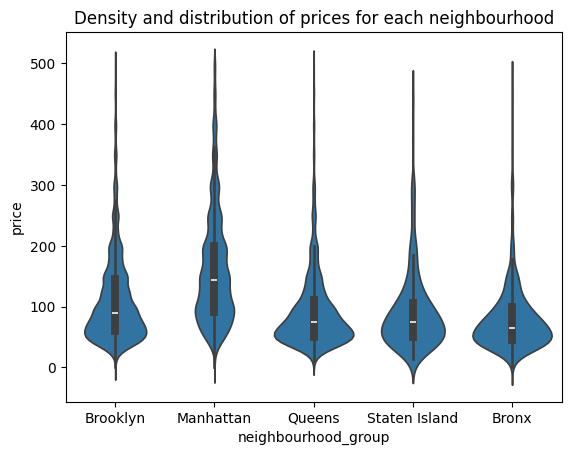

In [61]:
data=df[df.price < 500]
sns.violinplot(data, x = "neighbourhood_group", y = "price")
plt.title("Density and distribution of prices for each neighbourhood")

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

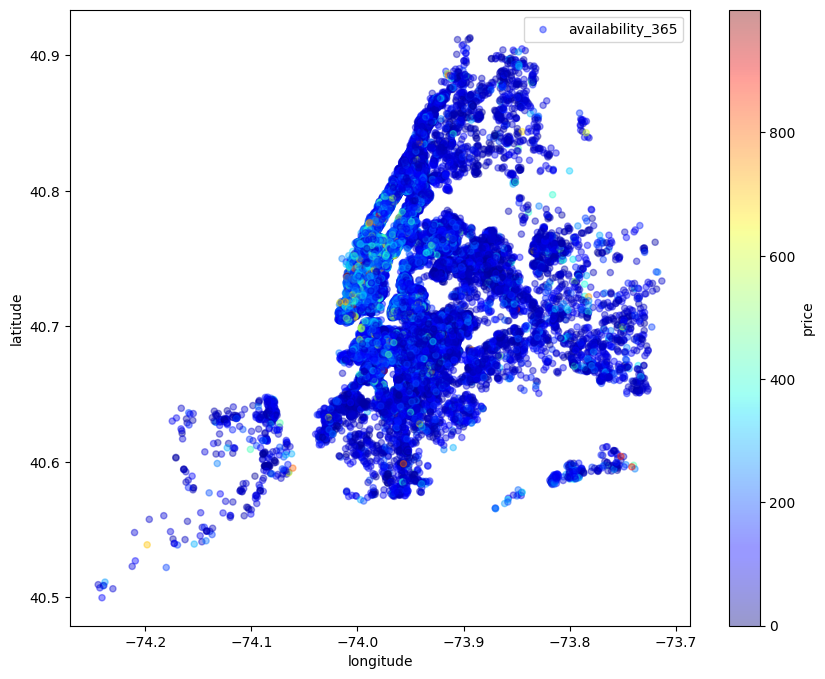

In [62]:
df.plot(kind = "scatter", x = "longitude", y = "latitude", label = "availability_365", c = "price", cmap = plt.get_cmap("jet"), colorbar = True, alpha = 0.4, figsize = (10, 8))
plt.legend

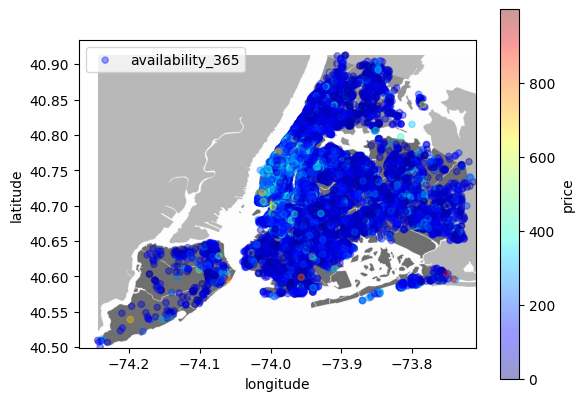

In [63]:
from PIL import Image
#scaling the image based on the latitude and longitude max and mins for proper output
nyc_map = Image.open("New_York_City_.png")
plt.imshow(nyc_map, zorder = 0, extent = [-74.244, -73.710, 40.499,40.913])
ax=plt.gca()

#using scatterplot again
df.plot(kind = "scatter", x = "longitude", y = "latitude", label = "availability_365", c = "price", ax = ax, cmap = plt.get_cmap("jet"), colorbar = True, alpha = 0.4, zorder = 5)
plt.legend()
plt.show()

In [64]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import RobustScaler

In [65]:
dataset_onehot = pd.get_dummies(df, columns=['neighbourhood_group', 'neighbourhood', 'room_type'], prefix=['ng', 'nh', 'rt'], drop_first=True)

# Split data into features (X) and target variable (Y)
X = dataset_onehot.drop(['price'], axis=1)
Y = dataset_onehot['price']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [66]:
print(x_train.dtypes)
x_train = pd.get_dummies(x_train, drop_first=True)


host_id                int64
latitude             float64
longitude            float64
minimum_nights         int64
number_of_reviews      int64
                      ...   
nh_Woodlawn             bool
nh_Woodrow              bool
nh_Woodside             bool
rt_Private room         bool
rt_Shared room          bool
Length: 234, dtype: object


In [67]:
regression_model = LinearRegression().fit(x_train, y_train)

# Calculate R-squared value
r_squared = regression_model.score(x_train, y_train)

# Predict using the model
y_pred = regression_model.predict(x_test)

# Calculate RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [68]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(x_train, y_train)

# Calculate RMSE for Lasso model
y_pred_lasso = lasso_model.predict(x_test)
rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))

# Display Lasso model coefficients
lasso_coefficients = pd.DataFrame(columns=["Variable", "Coefficient"])
lasso_coefficients["Variable"] = x_train.columns
lasso_coefficients["Coefficient"] = lasso_model.coef_
lasso_coefficients_sorted = lasso_coefficients.sort_values("Coefficient")

In [69]:
random_forest_model = RandomForestRegressor(n_estimators=30)
random_forest_model.fit(x_train, y_train)

# Calculate R-squared for Random Forest model
r_squared_rf = random_forest_model.score(x_train, y_train)

# Predict using Random Forest model
y_pred_rf = random_forest_model.predict(x_test)

# Calculate RMSE for Random Forest model
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Create a Gradient Boosting Regression model
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Fit the model to your training data
gradient_boosting_model.fit(x_train, y_train)

# Predict using the Gradient Boosting Regression model
y_pred_gradient_boosting = gradient_boosting_model.predict(x_test)

# Calculate R-squared for Gradient Boosting Regression
r2_gradient_boosting = r2_score(y_test, y_pred_gradient_boosting)

# Calculate RMSE for Gradient Boosting Regression
rmse_gradient_boosting = np.sqrt(mean_squared_error(y_test, y_pred_gradient_boosting))


In [75]:
import xgboost as xgb

# Create an XGBoost model
xgboost_model = xgb.XGBRegressor(n_estimators=100, max_depth=3)  # You can adjust the hyperparameters

# Fit the XGBoost model to your training data
xgboost_model.fit(x_train, y_train)

# Predict using the XGBoost model
y_pred_xgboost = xgboost_model.predict(x_test)

# Calculate R-squared for XGBoost
r2_xgboost = xgboost_model.score(x_test, y_test)

# Calculate RMSE for XGBoost
rmse_xgboost = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgboost))

In [77]:
model_scores_data = [
    {"Model": "Linear Regression", "R-squared": r_squared, "RMSE": rmse},
    {"Model": "Lasso Regression", "R-squared": lasso_model.score(x_train, y_train), "RMSE": rmse_lasso},
    {"Model": "Random Forest Regression", "R-squared": r_squared_rf, "RMSE": rmse_rf},
    {"Model": "XGBoost", "R-squared": r2_xgboost, "RMSE": rmse_xgboost},
    {"Model": "Gradient Boosting", "R-squared": r2_gradient_boosting, "RMSE": rmse_gradient_boosting}
]

# Create a DataFrame from the list of dictionaries
model_scores = pd.DataFrame(model_scores_data)

# Display the DataFrame
print(model_scores)

                      Model  R-squared       RMSE
0         Linear Regression   0.385445  84.640135
1          Lasso Regression   0.383055  84.669270
2  Random Forest Regression   0.916003  80.506524
3                   XGBoost   0.445735  80.655754
4         Gradient Boosting   0.431648  81.674306
